In [14]:
import pathlib
import os
import pandas as pd
import numpy as np


data_dir = pathlib.Path(os.getcwd()).parent / "data"

df22_1 = pd.read_csv(data_dir / "output_exp22_1.csv", sep=';')
df22_2 = pd.read_csv(data_dir / "output_exp22_2.csv", sep=';')
df23 = pd.read_csv(data_dir / "output_exp23.csv", sep=';')
df24 = pd.read_csv(data_dir / "output_exp24.csv", sep=';')

# 2.2.1. (dfS) and 2.2.2. (dfB)

In [169]:
dfS = df22_1.copy()
dfS = dfS.groupby(['size', 'patch', 'nprocs']).mean().reset_index()
dfS = dfS.rename(columns={'time': 'avg_time'})

# relative speedup
dfS['speedup'] = dfS.apply(
    lambda row: dfS[(dfS['size'] == row['size']) & (dfS['patch'] == row['patch']) & (dfS['nprocs'] == 1)]['avg_time'].values[0]
    /
    row['avg_time'], axis=1
)

# parallel efficiency
seqtime_size155 = 0.39382300106808543
seqtime_size1100 = 18.806384983938187
dfS['par-efficiency'] = dfS.apply(
    lambda row: seqtime_size155 / (row['avg_time'] * row['nprocs']) if row['size'] == 155 else seqtime_size1100 / (row['avg_time'] * row['nprocs']), axis=1
)

dfS

,size,patch,nprocs,avg_time,speedup,par-efficiency
0,155,26,1,0.276419,1.000000,1.424734
1,155,26,2,0.146140,1.891466,1.347418
2,155,26,4,0.085005,3.251799,1.158237
3,155,26,8,0.068473,4.036910,0.718940
4,155,26,16,0.072786,3.797700,0.338169
5,155,26,24,0.084524,3.270292,0.194137
6,155,26,32,0.097526,2.834301,0.126191
7,1100,26,1,13.419980,1.000000,1.401372
8,1100,26,2,6.661889,2.014441,1.411490
9,1100,26,4,3.377514,3.973331,1.392029


In [170]:
dfB = df22_2.copy()
dfB = dfB.groupby(['size', 'patch', 'nprocs']).mean().reset_index()
dfB = dfB.rename(columns={'time': 'avg_time'})

# relative speedup
dfB['speedup'] = dfB.apply(
    lambda row: dfB[(dfB['size'] == row['size']) & (dfB['patch'] == row['patch']) & (dfB['nprocs'] == 1)]['avg_time'].values[0]
    /
    row['avg_time'], axis=1
)

# parallel efficiency
seqtime_size155 = 0.2803074959665537
seqtime_size1100 = 13.123375411145389
dfB['par-efficiency'] = dfB.apply(
    lambda row: seqtime_size155 / (row['avg_time'] * row['nprocs']) if row['size'] == 155 else seqtime_size1100 / (row['avg_time'] * row['nprocs']), axis=1
)

dfB

,size,patch,nprocs,avg_time,speedup,par-efficiency
0,155,26,1,0.394086,1.000000,0.711286
1,155,26,2,0.210897,1.868616,0.664560
2,155,26,4,0.121818,3.235036,0.575259
3,155,26,8,0.086222,4.570571,0.406373
4,155,26,16,0.085253,4.622557,0.205497
5,155,26,24,0.096372,4.089207,0.121191
6,155,26,32,0.108531,3.631098,0.080711
7,1100,26,1,19.104935,1.000000,0.686910
8,1100,26,2,9.671634,1.975358,0.678447
9,1100,26,4,4.900177,3.898826,0.669536


/var/folders/bh/4ympj4l52bs8wxpg114kdh1m0000gn/T/ipykernel_7545/2871699089.py:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(x=x, y=y, hue=group_by, ax=axs[0], palette=sns.color_palette("husl", 3))
/var/folders/bh/4ympj4l52bs8wxpg114kdh1m0000gn/T/ipykernel_7545/2871699089.py:25: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(x=x, y=y, hue=group_by, ax=axs[1], palette=sns.color_palette("husl", 3))


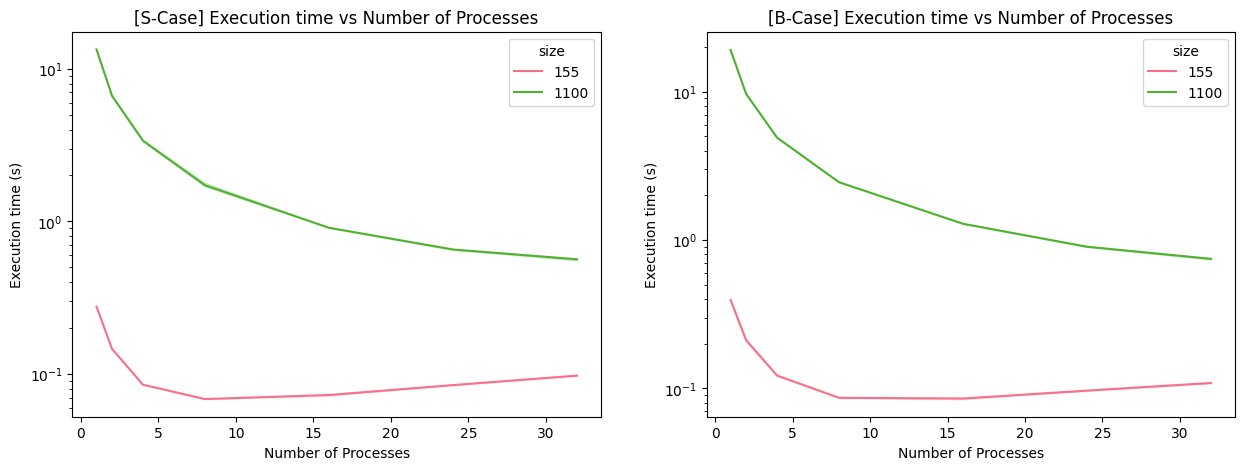

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

dfS = df22_1.copy()
dfB = df22_2.copy()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# plot 1
x = dfS['nprocs']
y = dfS['time']
group_by = dfS['size']

sns.lineplot(x=x, y=y, hue=group_by, ax=axs[0], palette=sns.color_palette("husl", 3))
axs[0].set_title('[S-Case] Execution time vs Number of Processes')
axs[0].set_xlabel('Number of Processes')
axs[0].set_ylabel('Execution time (s)')
axs[0].set_yscale('log')

# plot 2
x = dfB['nprocs']
y = dfB['time']
group_by = dfB['size']

sns.lineplot(x=x, y=y, hue=group_by, ax=axs[1], palette=sns.color_palette("husl", 3))
axs[1].set_title('[B-Case] Execution time vs Number of Processes')
axs[1].set_xlabel('Number of Processes')
axs[1].set_ylabel('Execution time (s)')
axs[1].set_yscale('log')

plt.show()

/Users/piaschwarzinger/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/piaschwarzinger/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/piaschwarzinger/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/piaschwarzinger/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

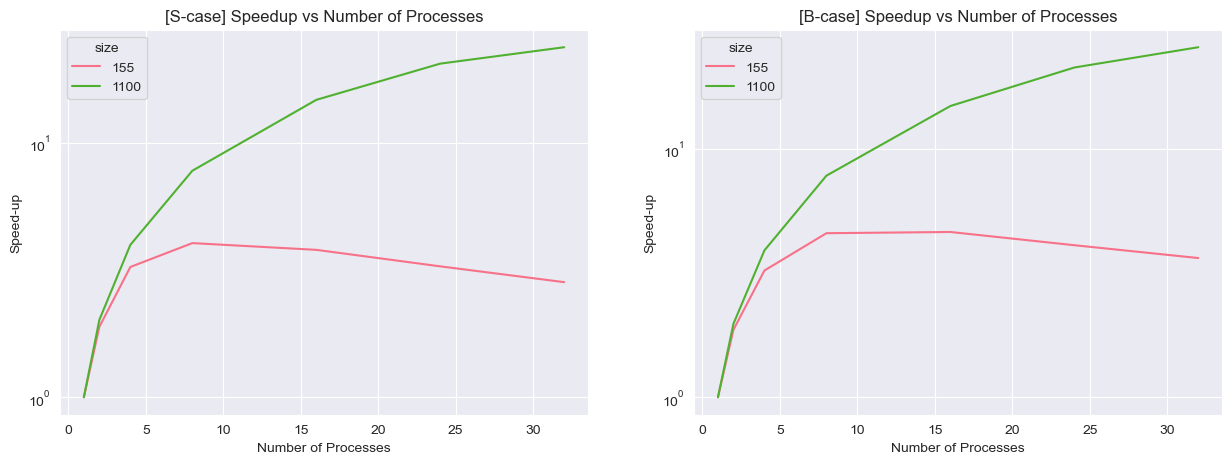

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

dfS = df22_1.copy()
dfS = dfS.groupby(['size', 'patch', 'nprocs']).mean().reset_index()
dfS = dfS.rename(columns={'time': 'avg_time'})
dfB = df22_2.copy()
dfB = dfB.groupby(['size', 'patch', 'nprocs']).mean().reset_index()
dfB = dfB.rename(columns={'time': 'avg_time'})


# relative speedup
dfS['speedup'] = dfS.apply(lambda row: dfS[(dfS['size'] == row['size']) & (dfS['patch'] == row['patch']) & (dfS['nprocs'] == 1)]['avg_time'].values[0]/row['avg_time'], axis=1)
dfB['speedup'] = dfB.apply(lambda row: dfB[(dfB['size'] == row['size']) & (dfB['patch'] == row['patch']) & (dfB['nprocs'] == 1)]['avg_time'].values[0]/row['avg_time'], axis=1)


fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# plot 1
x = dfS['nprocs']
y = dfS['speedup']
group_by = dfS['size']

sns.lineplot(x=x, y=y, hue=group_by, ax=axs[0], palette=sns.color_palette("husl", 3))
axs[0].set_title('[S-case] Speedup vs Number of Processes')
axs[0].set_xlabel('Number of Processes')
axs[0].set_ylabel('Speed-up')
axs[0].set_yscale('log')

# plot 2
x = dfB['nprocs']
y = dfB['speedup']
group_by = dfB['size']

sns.lineplot(x=x, y=y, hue=group_by, ax=axs[1], palette=sns.color_palette("husl", 3))
axs[1].set_title('[B-case] Speedup vs Number of Processes')
axs[1].set_xlabel('Number of Processes')
axs[1].set_ylabel('Speed-up')
axs[1].set_yscale('log')

plt.show()


/Users/piaschwarzinger/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/piaschwarzinger/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/piaschwarzinger/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/piaschwarzinger/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

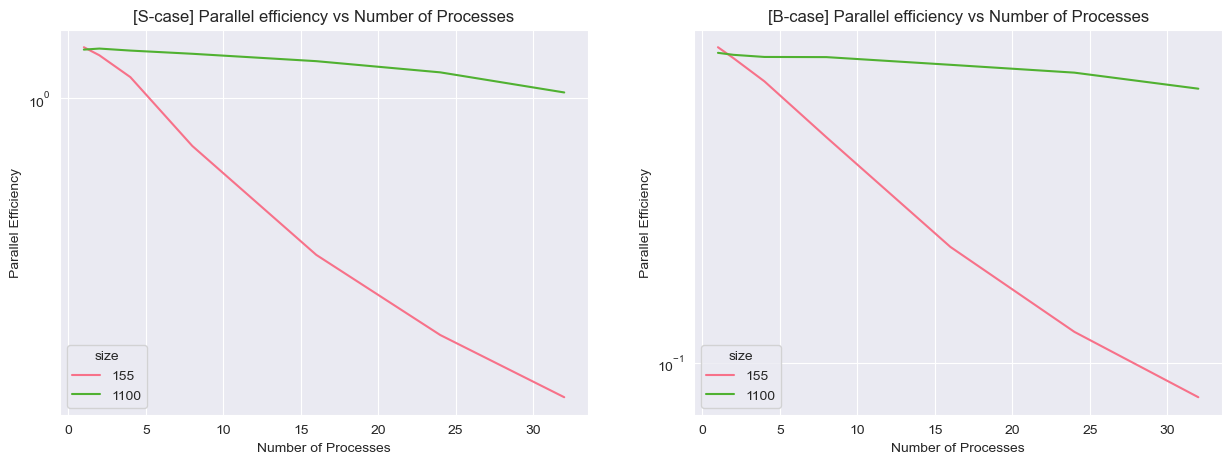

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

dfS = df22_1.copy()
dfS = dfS.groupby(['size', 'patch', 'nprocs']).mean().reset_index()
dfS = dfS.rename(columns={'time': 'avg_time'})
dfB = df22_2.copy()
dfB = dfB.groupby(['size', 'patch', 'nprocs']).mean().reset_index()
dfB = dfB.rename(columns={'time': 'avg_time'})


# parallel efficiency
seqtime_size155 = 0.39382300106808543
seqtime_size1100 = 18.806384983938187
dfS['par-efficiency'] = dfS.apply(lambda row: seqtime_size155 / (row['avg_time'] * row['nprocs']) if row['size'] == 155 else seqtime_size1100 / (row['avg_time'] * row['nprocs']), axis=1)
seqtime_size155 = 0.2803074959665537
seqtime_size1100 = 13.123375411145389
dfB['par-efficiency'] = dfB.apply(lambda row: seqtime_size155 / (row['avg_time'] * row['nprocs']) if row['size'] == 155 else seqtime_size1100 / (row['avg_time'] * row['nprocs']), axis=1)


fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# plot 1
x = dfS['nprocs']
y = dfS['par-efficiency']
group_by = dfS['size']

sns.lineplot(x=x, y=y, hue=group_by, ax=axs[0], palette=sns.color_palette("husl", 3))
axs[0].set_title('[S-case] Parallel efficiency vs Number of Processes')
axs[0].set_xlabel('Number of Processes')
axs[0].set_ylabel('Parallel Efficiency')
axs[0].set_yscale('log')

# plot 2
x = dfB['nprocs']
y = dfB['par-efficiency']
group_by = dfB['size']

sns.lineplot(x=x, y=y, hue=group_by, ax=axs[1], palette=sns.color_palette("husl", 3))
axs[1].set_title('[B-case] Parallel efficiency vs Number of Processes')
axs[1].set_xlabel('Number of Processes')
axs[1].set_ylabel('Parallel Efficiency')
axs[1].set_yscale('log')

plt.show()

/Users/piaschwarzinger/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/piaschwarzinger/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/xw/c2_ftv550y582rq99dfmgrp80000gn/T/ipykernel_9706/2601773233.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x, y=y, palette=sns.color_palette("husl", 3))
/Users/piaschwarzinger/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

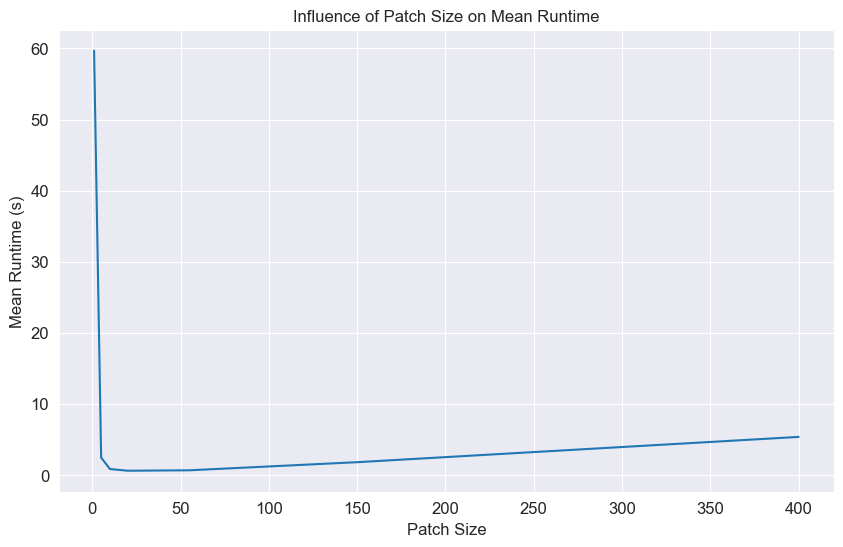

In [38]:
df23_ana = df23.copy()
df23_ana = df23_ana.groupby(['size', 'patch', 'nprocs'])['time'].mean().reset_index()
df23_ana = df23_ana.rename(columns={'time': 'avg_time'})

x = df23_ana['patch']
y = df23_ana['avg_time']

plt.figure(figsize=(10, 6))

sns.lineplot(x=x, y=y, palette=sns.color_palette("husl", 3))

plt.title('Influence of Patch Size on Mean Runtime', fontsize=12)
plt.xlabel('Patch Size', fontsize=12)
plt.ylabel('Mean Runtime (s)', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


    size  patch  nprocs   avg_time
0    800      1      16  50.020686
1    800      2      16  12.428263
2    800      3      16   5.235198
3    800      4      16   2.781848
4    800      5      16   1.778088
5    800      6      16   1.262205
6    800      7      16   1.025805
7    800      8      16   0.871605
8    800      9      16   0.841269
9    800     10      16   0.788733
10   800     11      16   0.777117
11   800     12      16   0.730836
12   800     13      16   0.721792
13   800     14      16   0.732972
14   800     15      16   0.712528
15   800     16      16   0.736369
16   800     17      16   0.714250
17   800     18      16   0.709131
18   800     19      16   0.711833
19   800     20      16   0.704302
20   800     21      16   0.712072
21   800     22      16   0.715015
22   800     23      16   0.718865
23   800     24      16   0.710345
24   800     25      16   0.706855
25   800     26      16   0.709854
26   800     27      16   0.715558
27   800     28     

/Users/piaschwarzinger/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/piaschwarzinger/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/xw/c2_ftv550y582rq99dfmgrp80000gn/T/ipykernel_9706/3658781162.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x, y=y, palette=sns.color_palette("husl", 3))
/Users/piaschwarzinger/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

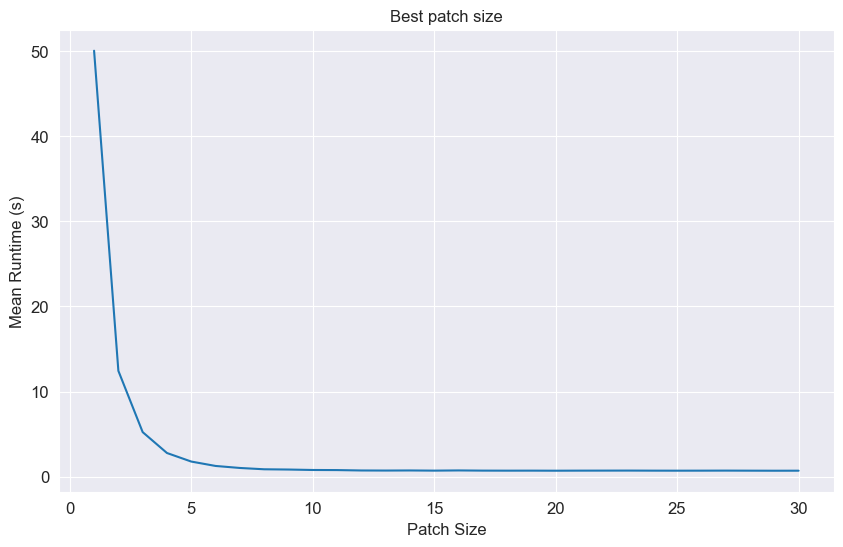

In [39]:
df24_ana = df24.copy()
df24_ana = df24_ana.groupby(['size', 'patch', 'nprocs'])['time'].mean().reset_index()
df24_ana = df24_ana.rename(columns={'time': 'avg_time'})
print(df24_ana)

x = df24_ana['patch']
y = df24_ana['avg_time']

plt.figure(figsize=(10, 6))

sns.lineplot(x=x, y=y, palette=sns.color_palette("husl", 3))

plt.title('Best patch size',fontsize=12)
plt.xlabel('Patch Size',fontsize=12)
plt.ylabel('Mean Runtime (s)',fontsize=12)

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.show()
